<a href="https://colab.research.google.com/github/Luichoo/Arbol_AVL_con_allegro/blob/main/cuardernos/Diabetes_RNA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split



## Base de datos

In [2]:
dataset=np.loadtxt('/content/drive/MyDrive/pima-indians-diabetes.data',delimiter=',')

In [3]:
dataset.shape

(768, 9)

In [4]:
x = dataset[:,:-1]
y = dataset[:,-1]
x

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [5]:
scaler=MinMaxScaler((0,1))
X=scaler.fit_transform(x)
X

array([[0.35294118, 0.74371859, 0.59016393, ..., 0.50074516, 0.23441503,
        0.48333333],
       [0.05882353, 0.42713568, 0.54098361, ..., 0.39642325, 0.11656704,
        0.16666667],
       [0.47058824, 0.91959799, 0.52459016, ..., 0.34724292, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.6080402 , 0.59016393, ..., 0.390462  , 0.07130658,
        0.15      ],
       [0.05882353, 0.63316583, 0.49180328, ..., 0.4485842 , 0.11571307,
        0.43333333],
       [0.05882353, 0.46733668, 0.57377049, ..., 0.45305514, 0.10119556,
        0.03333333]])

In [6]:
trainx, testx, trainy, testy= train_test_split(X,y, test_size=.5)
trainx

array([[0.11764706, 0.64824121, 0.60655738, ..., 0.4947839 , 0.21904355,
        0.06666667],
       [0.41176471, 0.84422111, 0.72131148, ..., 0.56929955, 0.30273271,
        0.31666667],
       [0.05882353, 0.44221106, 0.24590164, ..., 0.81967213, 0.17847993,
        0.08333333],
       ...,
       [0.05882353, 0.68341709, 0.60655738, ..., 0.55737705, 0.13706234,
        0.05      ],
       [0.        , 0.69346734, 0.49180328, ..., 0.51564829, 0.19470538,
        0.        ],
       [0.58823529, 0.66834171, 0.55737705, ..., 0.4023845 , 0.07130658,
        0.25      ]])

## Training

In [7]:
model = Sequential()
model.add(Dense(14, input_dim=8, activation='relu'))
model.add(Dense(7, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [8]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(trainx, trainy,validation_data=(testx, testy), epochs=300)

# resultados=model.evaluate(trainx, trainy)
# print("\n%s: %.2f%%" % (model.metrics_names[1], resultados[1]*100))
# print(model.predict(trainx).round())

Epoch 1/300
12/12 [==============================] - 5s 104ms/step - loss: 0.6914 - accuracy: 0.5651 - val_loss: 0.6844 - val_accuracy: 0.6250
Epoch 2/300
12/12 [==============================] - 0s 42ms/step - loss: 0.6823 - accuracy: 0.6484 - val_loss: 0.6783 - val_accuracy: 0.6536
Epoch 3/300
12/12 [==============================] - 1s 50ms/step - loss: 0.6765 - accuracy: 0.6484 - val_loss: 0.6738 - val_accuracy: 0.6484
Epoch 4/300
12/12 [==============================] - 0s 34ms/step - loss: 0.6722 - accuracy: 0.6484 - val_loss: 0.6700 - val_accuracy: 0.6536
Epoch 5/300
12/12 [==============================] - 1s 47ms/step - loss: 0.6685 - accuracy: 0.6484 - val_loss: 0.6668 - val_accuracy: 0.6536
Epoch 6/300
12/12 [==============================] - 0s 32ms/step - loss: 0.6653 - accuracy: 0.6484 - val_loss: 0.6642 - val_accuracy: 0.6536
Epoch 7/300
12/12 [==============================] - 0s 34ms/step - loss: 0.6633 - accuracy: 0.6484 - val_loss: 0.6614 - val_accuracy: 0.6536
Epoch

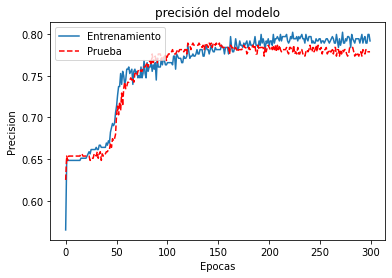

In [19]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'],'r--')
plt.title('precisión del modelo')
plt.xlabel('Epocas')
plt.ylabel('Precision')
plt.legend(['Entrenamiento','Prueba'], loc='upper left')
plt.savefig('grafica_diabetes.png', dpi=300)
plt.show()

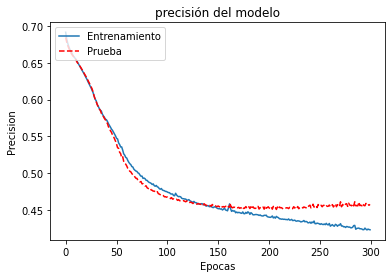

In [20]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'],'r--')
plt.title('precisión del modelo')
plt.xlabel('Epocas')
plt.ylabel('Precision')
plt.legend(['Entrenamiento','Prueba'], loc='upper left')
plt.savefig('grafica_diabetes_loss.png', dpi=300)
plt.show()

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                126       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 239
Trainable params: 239
Non-trainable params: 0
_________________________________________________________________


## Explicación del resumen

al multiplicar el valor de las entradas con la siguiente capa y sumar el valor de la capa, da igual al numero de parámetros:
Sea An la capa, la formula para cada parámetro seria:  
### An(A(n+1))+A(n+1)=Pn+1.

In [22]:
y_predic = model.predict(testx)
y_predic

12/12 [==============================] - 0s 2ms/step


array([[0.11665408],
       [0.48348075],
       [0.17007169],
       [0.01121844],
       [0.00749702],
       [0.72874933],
       [0.08271463],
       [0.35218328],
       [0.04343173],
       [0.01292213],
       [0.49144796],
       [0.02854617],
       [0.2184576 ],
       [0.53947145],
       [0.03446417],
       [0.11785263],
       [0.2000713 ],
       [0.8535267 ],
       [0.4334149 ],
       [0.33644602],
       [0.18808277],
       [0.9374518 ],
       [0.4731437 ],
       [0.09464759],
       [0.19351904],
       [0.39983097],
       [0.7208519 ],
       [0.36133385],
       [0.67071027],
       [0.24133667],
       [0.06387261],
       [0.35452855],
       [0.8753104 ],
       [0.81317014],
       [0.5639908 ],
       [0.10640743],
       [0.01250924],
       [0.60326463],
       [0.10155092],
       [0.05690311],
       [0.17093296],
       [0.56442785],
       [0.39246395],
       [0.5194657 ],
       [0.74146616],
       [0.11549937],
       [0.06302289],
       [0.011

In [26]:
y_predictC=np.where(y_predic<.5,0,1)
y_predictC.shape


(384, 1)